In [24]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import csv

In [25]:
import csv
import numpy as np

def save_as_csv(file_name, data):
    if isinstance(data, np.ndarray):
        data = data.tolist()

    # Now data is either a regular Python list or some other iterable
    with open(file_name, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerows(data)

    print(f'The array has been saved to {file_name}')
    return None


In [26]:
def f(x):
    return -x[:, 0]**2 + x[:, 1] - 1

def generate_dataset(n_samples, shift_factor=0.5):
    X1 = np.random.rand(n_samples, 2)
    X2 = np.random.rand(n_samples, 2) + shift_factor
    y1 = f(X1)
    y2 = f(X2)
    
    return X1, y1, X2, y2

# Generate datasets with covariate shift
n_samples = 1000
shift_factor = 0.5
X1, y1, X2, y2 = generate_dataset(n_samples, shift_factor)


In [27]:
save_as_csv("X_train", X1)
save_as_csv("y_train", [y1])
save_as_csv("X_test", X2)
save_as_csv("y_test", [y2])

The array has been saved to X_train
The array has been saved to y_train
The array has been saved to X_test
The array has been saved to y_test


/Users/norahallqvist/opt/anaconda3/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/norahallqvist/opt/anaconda3/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/norahallqvist/opt/anaconda3/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/norahallqvist/opt/anaconda3/envs/cs109a/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

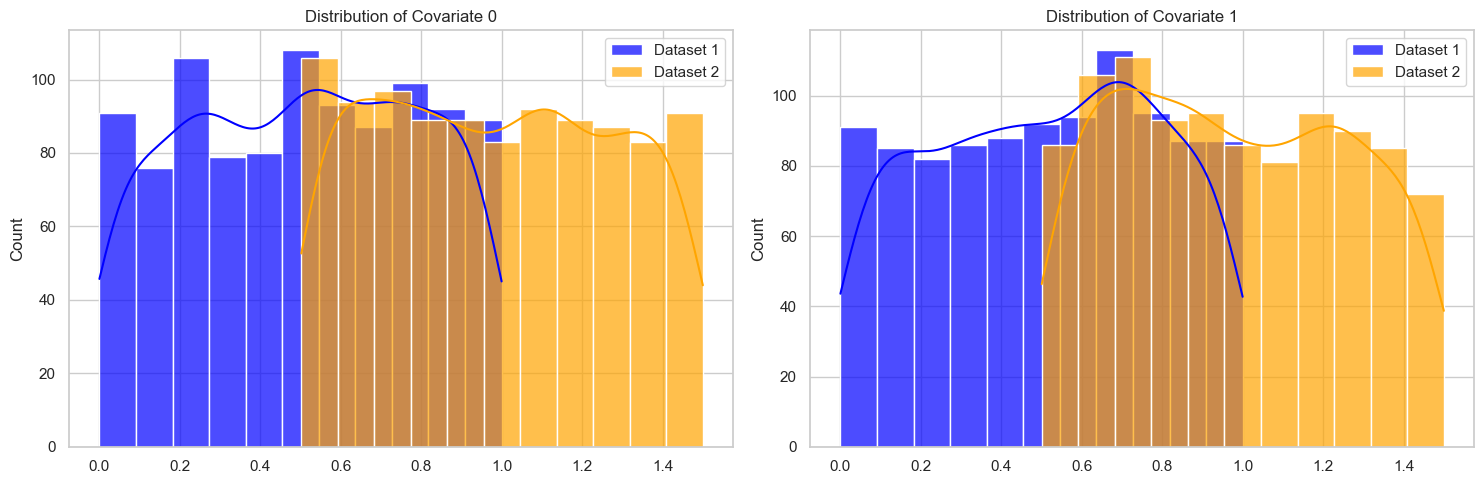

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Number of covariates/features
num_covariates = X1.shape[1]

# Define the number of rows and columns for the subplot grid
rows = 1  # Number of rows
cols = num_covariates  # Number of columns

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5))

# Flatten the axes if there is more than one row
axes = axes.flatten()

# Plot the distribution of each covariate for both datasets on the same plot
for i, ax in enumerate(axes):
    # Plot for Covariate i in both datasets
    sns.histplot(X1[:, i], kde=True, color='blue', label='Dataset 1', alpha=0.7, ax=ax)
    sns.histplot(X2[:, i], kde=True, color='orange', label='Dataset 2', alpha=0.7, ax=ax)
    
    ax.set_title(f'Distribution of Covariate {i}')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [29]:
# Step 1: assign a label of 1 to test data set, and a label of 0 to train data set
X_combined = np.vstack((X1, X2))
y_combined = np.hstack((np.zeros(X1.shape[0]), np.ones(X2.shape[0])))


## Train logistic regression
clf = LogisticRegression().fit(X_combined, y_combined)
y_pred_combined = clf.predict(X_combined)

In [30]:
def check_accuracy(y_pred, y_true):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    print(
        f"""
            accuracy: {round(accuracy, 3)}
            precision: {round(precision, 3)}
            recall: {round(recall, 3)}
    """
    )
    return None

check_accuracy(y_pred_combined, y_combined)


            accuracy: 0.872
            precision: 0.879
            recall: 0.863
    


In [36]:
y_pred_combined_prob = clf.predict_proba(X1)
weights = y_pred_combined_prob[:,1] / y_pred_combined_prob[:,0]
save_as_csv("weights", [weights])

The array has been saved to weights


In [32]:
def compute_rmse(X_train,y_train, X_test, y_test, weight=None):

    if weight is not None:
        # train a weighted model
        lr = LinearRegression().fit(X_train, y_train, weight)
        y_hat_train_weight = lr.predict(X_train)
        y_hat_test_weight = lr.predict(X_test)
        print("Scores with weights for train set:")
        print(mean_squared_error(y_train,y_hat_train_weight))
        print("")
        print("RMSE with weights for test set:")
        print(mean_squared_error(y_test, y_hat_test_weight))

    else:
        # train simple linear regression
        lr = LinearRegression().fit(X_train, y_train)
        y_hat_train = lr.predict(X_train)
        y_hat_test = lr.predict(X_test)
        print("Scores for train set:")
        print(mean_squared_error(y_train, y_hat_train))
        print("")
        print("RMSE for test set:")
        print(mean_squared_error(y_test, y_hat_test))

    return lr

In [33]:
compute_rmse(X1, y1, X2, y2, weight=weights)

Scores with weights for train set:
0.02533456205769656

RMSE with weights for test set:
0.0575456465690346


LinearRegression()

In [34]:
compute_rmse(X1, y1, X2, y2)

Scores for train set:
0.005560899632673305

RMSE for test set:
0.16635647719853136


LinearRegression()